In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier






In [ ]:
weather = pd.read_csv('/content/gdrive/MyDrive/machine_learning/weatgerAUS-preprocess.csv')
weather.head(4)
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=420)
weather.head(10)
print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])


Train size: 89275
Test size:  38261


In [ ]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train, X_test, y_train, y_test, y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')


w =  [[-0.01808801 -0.07452985  0.01865206  0.18407318  0.06128572 -0.17259806
  -0.00288924  0.45133042 -0.02529063  0.04082261 -0.03640618 -0.18854462
  -0.03097731  0.81419693  0.54150437 -0.81680732  0.02343172  0.12183437
  -0.05082841  0.09717217  0.10936028  0.00714543 -0.03080934 -0.06419494
   0.00514737  0.00205809]]
b =  [-1.20913552]
linear 's testing accuracy 0.843339, recall is 0.429635', auc is 0.856397
09:16:342593
Confusion Matrix
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


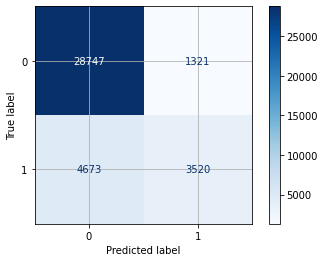



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     30068
           1       0.73      0.43      0.54      8193

    accuracy                           0.84     38261
   macro avg       0.79      0.69      0.72     38261
weighted avg       0.83      0.84      0.83     38261



ROC Curve
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


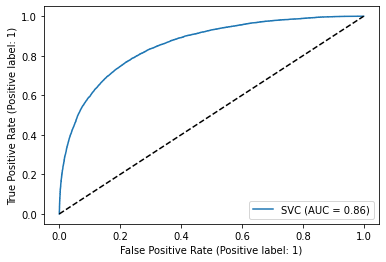



Checking model fitness
-----------------------------------------------------
Train score: 0.8436
Test score:  0.8433




In [ ]:
#SVM
time0 = time()


for kernel in ["linear"]:
    clf = SVC(kernel = kernel
             ,gamma="auto"
             ,degree = 1
             ,cache_size = 8000
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test,y_test) # return accuracy
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test,clf.decision_function(X_test))
    w = clf.coef_
    b = clf.intercept_
    print('w = ', w)
    print('b = ', b)
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

evaluate(clf,X_train, X_test, y_train, y_test, result)


Confusion Matrix
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


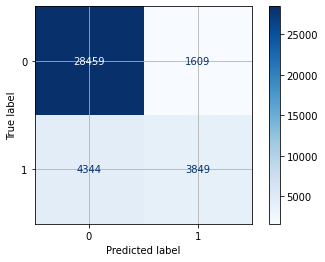



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     30068
           1       0.71      0.47      0.56      8193

    accuracy                           0.84     38261
   macro avg       0.79      0.71      0.73     38261
weighted avg       0.83      0.84      0.83     38261



ROC Curve
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


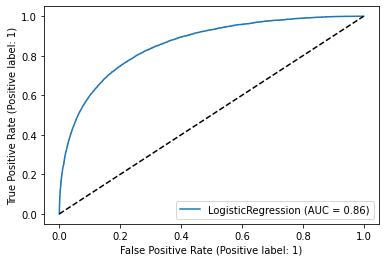



Checking model fitness
-----------------------------------------------------
Train score: 0.844
Test score:  0.8444




In [ ]:
#Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred
evaluate(logreg,X_train, X_test, y_train, y_test, y_pred)

Confusion Matrix
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


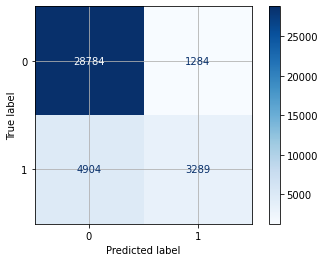



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     30068
           1       0.72      0.40      0.52      8193

    accuracy                           0.84     38261
   macro avg       0.79      0.68      0.71     38261
weighted avg       0.83      0.84      0.82     38261



ROC Curve
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


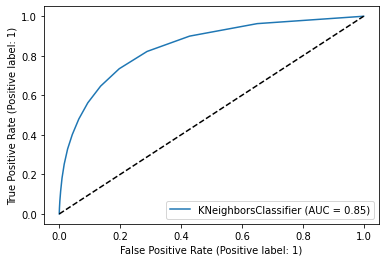



Checking model fitness
-----------------------------------------------------
Train score: 0.8551
Test score:  0.8383




In [ ]:
#KNN
# We define the model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# We train model
knncla.fit(X_train, y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)
evaluate(knncla,X_train, X_test, y_train, y_test, Y_predict6)

In [ ]:
#Building ranadom forest with these parameters

Confusion Matrix
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


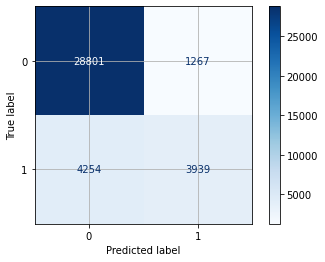



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     30068
           1       0.76      0.48      0.59      8193

    accuracy                           0.86     38261
   macro avg       0.81      0.72      0.75     38261
weighted avg       0.85      0.86      0.84     38261



ROC Curve
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


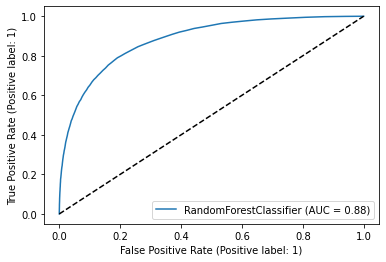



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.8557




In [ ]:


# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)
evaluate(rfcla,X_train, X_test, y_train, y_test, Y_predict5)

Train score: 0.9869
Test score:  0.8442
Train score: 0.9962
Test score:  0.8499
Train score: 0.9986
Test score:  0.8518
Train score: 0.9994
Test score:  0.8534
Train score: 0.9996
Test score:  0.8546
Train score: 0.9998
Test score:  0.8554
Train score: 0.9999
Test score:  0.8558
Train score: 0.9999
Test score:  0.856
Train score: 1.0
Test score:  0.856
Train score: 1.0
Test score:  0.8557
Train score: 1.0
Test score:  0.8565
Train score: 1.0
Test score:  0.8563
Train score: 1.0
Test score:  0.8561
Train score: 1.0
Test score:  0.8559
Train score: 1.0
Test score:  0.8561
Train score: 1.0
Test score:  0.8566
Train score: 1.0
Test score:  0.8561
Train score: 1.0
Test score:  0.8561
Train score: 1.0
Test score:  0.8564
Train score: 1.0
Test score:  0.8564
Train score: 1.0
Test score:  0.8564
Train score: 1.0
Test score:  0.8561
Train score: 1.0
Test score:  0.8563
Train score: 1.0
Test score:  0.856
Train score: 1.0
Test score:  0.8562
Train score: 1.0
Test score:  0.8563
Train score: 1.0


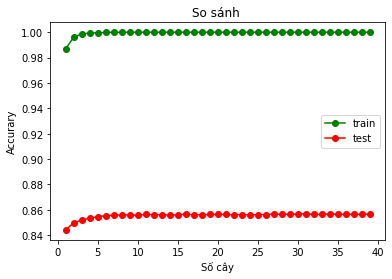

In [ ]:
Xt=[]
Ytr=[]
Yte=[]
for i in range(1,40):
  Xt.append(i)
  a=i*10
  if (1):
    rfcla = RandomForestClassifier(n_estimators=a,random_state=9,n_jobs=-1)

# We train model
    rfcla.fit(X_train, y_train)

# We predict target values
    Y_predict5 = rfcla.predict(X_test)
  Ytr.append(round(rfcla.score(X_train, y_train), 4))
  Yte.append(round(rfcla.score(X_test, y_test), 4))
  print('Train score:', round(rfcla.score(X_train, y_train), 4))
  print('Test score: ', round(rfcla.score(X_test, y_test), 4))
# We define the model

plt.plot(Xt, Ytr, 'go-', label='train')
plt.plot(Xt, Yte, 'ro-', label='test')
plt.title('So sánh ')
plt.xlabel('Số cây')
plt.ylabel('Accurary')
plt.legend(loc='best')
plt.show()

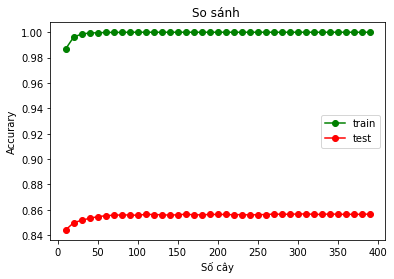

In [ ]:
X=[]
for i in range(1,40):
  X.append(i*10)
plt.plot(X, Ytr, 'go-', label='train')
plt.plot(X, Yte, 'ro-', label='test')
plt.title('So sánh ')
plt.xlabel('Số cây')
plt.ylabel('Accurary')
plt.legend(loc='best')
plt.show()

Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1 4
Test score:  1 4
Train score: 1

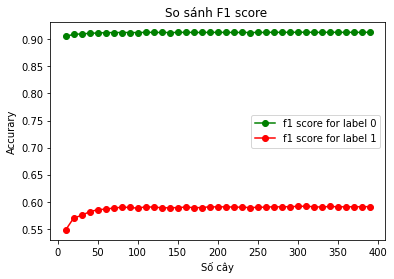

In [ ]:
Xt=[]
f1_test0=[]
f1_test=[]
y_test0=np.logical_not(y_test)
for i in range(1,40):
  Xt.append(i*10)
  a=i*10
  if (1):
    rfcla = RandomForestClassifier(n_estimators=a,random_state=9,n_jobs=-1)

# We train model
    rfcla.fit(X_train, y_train)

# We predict target values
    Y_predict5 = rfcla.predict(X_test)
    cur_f1=f1_score(y_test,Y_predict5,zero_division=1)
    cur0_f1=f1_score(y_test0,np.logical_not(Y_predict5))
    f1_test.append(cur_f1)
    f1_test0.append(cur0_f1)
  print('Train score:', round(cur_f1), 4)
  print('Test score: ', round(cur0_f1), 4)
# We define the model

plt.plot(Xt, f1_test0, 'go-', label='f1 score for label 0')
plt.plot(Xt, f1_test, 'ro-', label='f1 score for label 1')
plt.title('So sánh F1 score ')
plt.xlabel('Số cây')
plt.ylabel('F1 score')
plt.legend(loc='best')
plt.show()

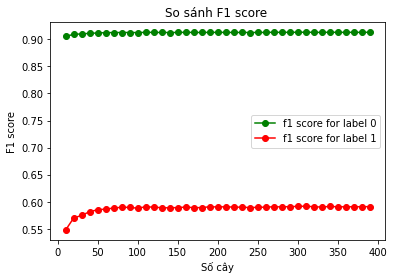

In [ ]:
plt.plot(Xt, f1_test0, 'go-', label='f1 score for label 0')
plt.plot(Xt, f1_test, 'ro-', label='f1 score for label 1')
plt.title('So sánh F1 score ')
plt.xlabel('Số cây')
plt.ylabel('F1 score')
plt.legend(loc='best')
plt.show()

Model Comparisons

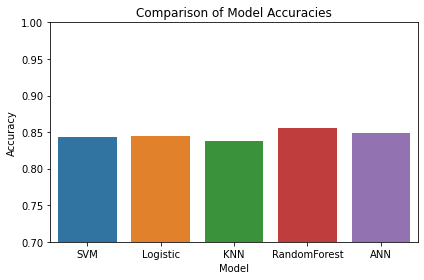

In [ ]:


sns.barplot(x=['SVM', 'Logistic', 'KNN', 'RandomForest', 'ANN'],
            y=[0.8433,0.8444,0.8383,0.8557,0.8483]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

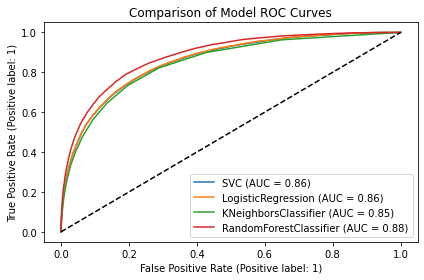

In [ ]:
fig, ax = plt.subplots()
models = [clf, logreg, knncla, rfcla]
for model in models:
    plot_roc_curve(model, 
                   X_test, 
                   y_test,
                   ax=ax
                  )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Comparison of Model ROC Curves')
plt.tight_layout()

In [ ]:
!pip install keras==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Keras-Preprocessing==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 20.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
!pip install keras==2.9.0
!pip install Keras-Preprocessing==1.1.2
!pip install tensorflow
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 8.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [ ]:
y_train.value_counts()

0    70089
1    19186
Name: RainTomorrow, dtype: int64

In [ ]:
y_test.value_counts()

0    30068
1     8193
Name: RainTomorrow, dtype: int64

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2232/2232 [==============================] - 21s 7ms/step - loss: 0.5075 - accuracy: 0.7852 - val_loss: 0.3964 - val_accuracy: 0.7864
Epoch 2/150
2232/2232 [==============================] - 13s 6ms/step - loss: 0.4225 - accuracy: 0.8081 - val_loss: 0.3840 - val_accuracy: 0.8405
Epoch 3/150
2232/2232 [==============================] - 8s 4ms/step - loss: 0.4104 - accuracy: 0.8187 - val_loss: 0.3762 - val_accuracy: 0.8424
Epoch 4/150
2232/2232 [==============================] - 8s 4ms/step - loss: 0.4031 - accuracy: 0.8200 - val_loss: 0.3714 - val_accuracy: 0.8440
Epoch 5/150
2232/2232 [==============================] - 8s 4ms/step - loss: 0.4033 - accuracy: 0.8202 - val_loss: 0.3691 - val_accuracy: 0.8447
Epoch 6/150
2232/2232 [==============================] - 8s 3ms/step - loss: 0.3997 - accuracy: 0.8213 - val_loss: 0.3677 - val_accuracy: 0.8455
Epoch 7/150
2232/2232 [==============================] - 8s 4ms/step - loss: 0.3987 - accuracy: 0.8283 - val_loss: 0.3664 - val_

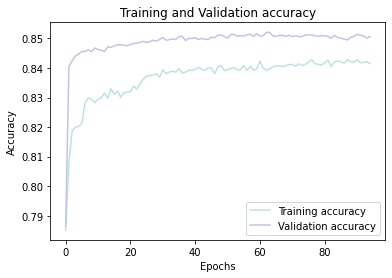

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

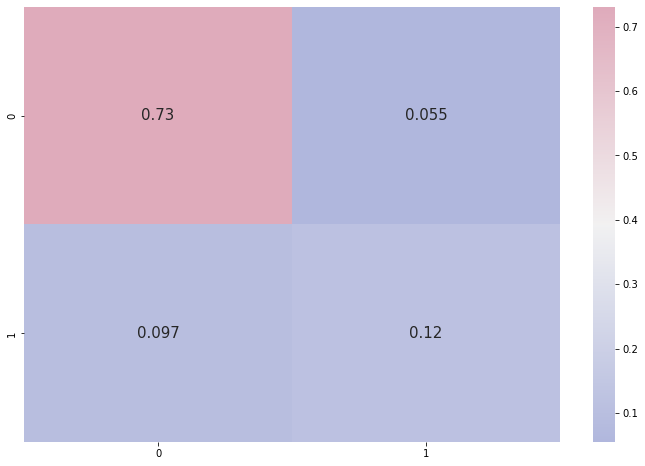

In [ ]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})